# **Mount Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

Do one at a time of Test, Valid and Train

Creating the 240 images

In [0]:
import os

In [0]:
orig_dir = '/content/gdrive/My Drive/NEUTROPHIL/Test/Original'
print('total images:', len(os.listdir(orig_dir)))
temp = os.listdir(orig_dir)

total images: 624


In [0]:
from PIL import Image
import numpy as np

save_dir = '/content/gdrive/My Drive/NEUTROPHIL/Test/240/240'
next_pix = [os.path.join(orig_dir, fname) 
                for fname in temp[:]]

for i, img_path in enumerate(next_pix):
  img = Image.open(img_path)
  area = (80, 0, 320, 240)
  cropped_img1 = img.crop(area)
  area = (0, 0, 240, 240)
  cropped_img2 = img.crop(area)
  save_dest = 'A' + temp[i]
  save_dest = os.path.join(save_dir, save_dest)
  cropped_img1.save(save_dest)
  save_dest = 'B' + temp[i]
  save_dest = os.path.join(save_dir, save_dest)
  cropped_img2.save(save_dest)

Produce 32 x 32

In [0]:
orig_dir = '/content/gdrive/My Drive/NEUTROPHIL/Test/240/240'
print('total images:', len(os.listdir(orig_dir)))
temp = os.listdir(orig_dir)

total images: 1248


In [0]:
from PIL import Image
import numpy as np

size = 32, 32
save_dir = '/content/gdrive/My Drive/NEUTROPHIL/Test/32/32'
next_pix = [os.path.join(orig_dir, fname) 
                for fname in temp[:]]

for i, img_path in enumerate(next_pix):
  img = Image.open(img_path)
  basewidth = 32
  img = img.resize((basewidth,basewidth), Image.ANTIALIAS)
  save_dest = os.path.join(save_dir, temp[i])
  img.save(save_dest)


Magnitude 32

In [0]:
import numpy as np
from numpy import isneginf
from scipy.stats import iqr 

def compute_mag_phase(toBeTransfromed):
    dft = np.fft.fft2(toBeTransfromed)
    dft_shift = np.fft.fftshift(dft)
    mag = np.abs(dft_shift)
    ang = np.angle(dft_shift)
    return mag, ang

def reconstruct(mag,ang):
    combined = np.multiply(mag, np.exp(1j*ang))
    #combinedReal = np.real(combined)
    #combinedImag = np.imag(combined)
    fftx = np.fft.ifftshift(combined)
    ffty = np.fft.ifft2(fftx)
    imgCombined = np.abs(ffty)
    return imgCombined

def pre_process_mag(dataset):
    mag = np.zeros(dataset.shape)
    phase = np.zeros(dataset.shape)
    x= 0
    for i in range(0,dataset.shape[0]):
      mag[i,:,:],phase[i,:,:] = compute_mag_phase(dataset[i])
    return mag,phase


def reconstructAll(mag, ang):
    recon = np.zeros(mag.shape)
    for i in range(0,recon.shape[0]):
      recon[i,:,:] = reconstruct(mag[i,:,:],ang[i,:,:])
    return recon

In [0]:
import random
np.random.seed(100)

noise_mag = np.random.uniform(size = (32,32,3),low = 0.0, high = 1.0)
#print(noise_mag[0])

In [0]:
orig_dir = '/content/gdrive/My Drive/NEUTROPHIL/Test/32/32'
print('total images:', len(os.listdir(orig_dir)))
temp = os.listdir(orig_dir)

total images: 1248


<PIL.Image.Image image mode=RGB size=32x32 at 0x7FA69B510940>


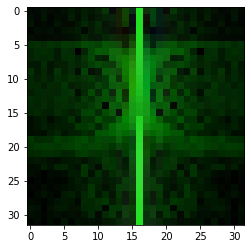

In [0]:
from PIL import Image
import numpy as np

size = 32, 32
save_dir = '/content/gdrive/My Drive/NEUTROPHIL/Test/32MAG/32MAG'
next_pix = [os.path.join(orig_dir, fname) 
                for fname in temp[:]]

for i, img_path in enumerate(next_pix):
  img = Image.open(img_path)
  im = np.array(img) /255
  mag,ang = compute_mag_phase(im)
  #im = reconstruct(mag,noise_mag)
  #normalise magnitude into range 0,1
  mag = ((np.log(mag+1))/5)
  im = Image.fromarray((mag * 255).astype(np.uint8))
  if i ==109 :
    plt.imshow(im)
    print(im)
  save_dest = os.path.join(save_dir, temp[i])
  im.save(save_dest)

In [0]:
orig_dir = '/content/gdrive/My Drive/NEUTROPHIL/Test/32/32'
print('total images:', len(os.listdir(orig_dir)))
temp = os.listdir(orig_dir)

total images: 1248


In [0]:
from PIL import Image
import numpy as np

size = 32, 32
save_dir = '/content/gdrive/My Drive/NEUTROPHIL/Test/32NOISYMAG/32NOISYMAG'
next_pix = [os.path.join(orig_dir, fname) 
                for fname in temp[:]]

for i, img_path in enumerate(next_pix):
  img = Image.open(img_path)
  im = np.array(img) /255
  mag,ang = compute_mag_phase(im)
  im = reconstruct(noise_mag,ang)
  im = Image.fromarray((im*255).astype(np.uint8))
  if i ==600 :
    print("yo")
  if i ==2000 :
    print("yo")
  if i ==3500 :
    print("yo")
  if i ==3800 :
    print("yo")
  if i ==4100 :
    print("yo")
  if i ==4103 :
    print("yo")
    plt.imshow(im)
  save_dest = os.path.join(save_dir, temp[i])
  im.save(save_dest)

yo


b and w

In [0]:
orig_dir = '/content/gdrive/My Drive/NEUTROPHIL/Test/32/32'
print('total images:', len(os.listdir(orig_dir)))
temp = os.listdir(orig_dir)

total images: 1248


In [0]:
from PIL import Image
import numpy as np
import cv2

size = 32, 32
save_dir = '/content/gdrive/My Drive/NEUTROPHIL/Test/32GREY/32GREY'
next_pix = [os.path.join(orig_dir, fname) 
                for fname in temp[:]]

for i, img_path in enumerate(next_pix):
  image = cv2.imread(img_path)
  save_dest = os.path.join(save_dir, temp[i])
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  cv2.imwrite(save_dest, gray)

64 x 64


In [0]:
orig_dir = '/content/gdrive/My Drive/NEUTROPHIL/Test/240/240'
print('total images:', len(os.listdir(orig_dir)))
temp = os.listdir(orig_dir)

total images: 1248


In [0]:
from PIL import Image
import numpy as np

size = 64, 64
save_dir = '/content/gdrive/My Drive/NEUTROPHIL/Test/64/64'
next_pix = [os.path.join(orig_dir, fname) 
                for fname in temp[:]]

for i, img_path in enumerate(next_pix):
  img = Image.open(img_path)
  basewidth = 64
  img = img.resize((basewidth,basewidth), Image.ANTIALIAS)
  save_dest = os.path.join(save_dir, temp[i])
  img.save(save_dest)

In [0]:
import random
np.random.seed(100)

noise_mag = np.random.uniform(size = (64,64,3),low = 0.0, high = 1.0)


In [0]:
orig_dir = '/content/gdrive/My Drive/NEUTROPHIL/Valid/64/64'
print('total images:', len(os.listdir(orig_dir)))
temp = os.listdir(orig_dir)

total images: 996


In [0]:
from PIL import Image
import numpy as np

size = 64, 64
save_dir = '/content/gdrive/My Drive/NEUTROPHIL/Valid/64MAG/64MAG'
next_pix = [os.path.join(orig_dir, fname) 
                for fname in temp[:]]

for i, img_path in enumerate(next_pix):
  img = Image.open(img_path)
  im = np.array(img) /255
  mag,ang = compute_mag_phase(im)
  #im = reconstruct(mag,noise_mag)
  #normalise magnitude into range 0,1
  mag = ((np.log(mag+1))/5)
  im = Image.fromarray((mag * 255).astype(np.uint8))
  if i ==109 :
    plt.imshow(im)
    print(im)
  save_dest = os.path.join(save_dir, temp[i])
  im.save(save_dest)

In [0]:
from PIL import Image
import numpy as np

size = 64, 64
save_dir = '/content/gdrive/My Drive/NEUTROPHIL/Valid/64NOISYMAG/64NOISYMAG'
next_pix = [os.path.join(orig_dir, fname) 
                for fname in temp[:]]

for i, img_path in enumerate(next_pix):
  img = Image.open(img_path)
  im = np.array(img) /255
  mag,ang = compute_mag_phase(im)
  im = reconstruct(noise_mag,ang)
  im = Image.fromarray((im*255).astype(np.uint8))
  if i ==600 :
    print("yo")
  if i ==2000 :
    print("yo")
  if i ==3500 :
    print("yo")
  if i ==3800 :
    print("yo")
  if i ==4100 :
    print("yo")
  if i ==4103 :
    print("yo")
    plt.imshow(im)
  save_dest = os.path.join(save_dir, temp[i])
  im.save(save_dest)

yo


# NEW METHOD

In [0]:
from google.colab import drive
drive.mount('/content/gdrive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import os

In [0]:
mag_dir = '/content/gdrive/My Drive/NEUTROPHIL/Train/32/32'
print('total images:', len(os.listdir(mag_dir)))
temp_mag = os.listdir(mag_dir)

total images: 4002


In [0]:
orig_dir = '/content/gdrive/My Drive/NEUTROPHIL/Train/32/32'
print('total images:', len(os.listdir(orig_dir)))
temp = os.listdir(orig_dir)

total images: 4002


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


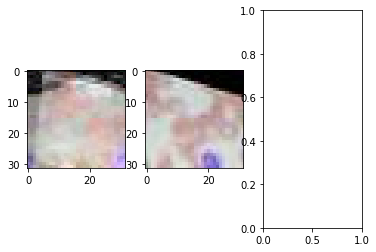

In [0]:
from PIL import Image
import numpy as np

size = 32, 32
save_dir = '/content/gdrive/My Drive/NEUTROPHIL/Train/32MAGSWAP/32MAGSWAP'
next_pix = [os.path.join(orig_dir, fname) 
                for fname in temp[:]]
mag_pix = os.path.join(mag_dir, temp_mag[0])

for i, img_path in enumerate(next_pix):
  img = Image.open(img_path)
  im = np.array(img) /255
  mag,ang = compute_mag_phase(im)

  img_mag = Image.open(mag_pix)
  im_mag = np.array(img_mag) /255
  mag_mag,ang_mag = compute_mag_phase(im_mag)

  recon = reconstruct(mag_mag,ang)

  im = Image.fromarray((recon * 255).astype(np.uint8))
  if i ==1 :
    plt.subplot(131)
    plt.imshow(recon)
    plt.subplot(132)
    plt.imshow(im_mag)
    plt.subplot(133)
    #plt.imshow(im)
    #print(im)
  save_dest = os.path.join(save_dir, temp[i])
  im.save(save_dest)

produce 128 x 128

In [25]:
orig_dir = '/content/gdrive/My Drive/NEUTROPHIL/Train/240/240'
print('total images:', len(os.listdir(orig_dir)))
temp = os.listdir(orig_dir)

total images: 4002


In [0]:
from PIL import Image
import numpy as np

size = 64, 64
save_dir = '/content/gdrive/My Drive/NEUTROPHIL/Train/64/64'
next_pix = [os.path.join(orig_dir, fname) 
                for fname in temp[:]]

for i, img_path in enumerate(next_pix):
  img = Image.open(img_path)
  basewidth = 64
  img = img.resize((basewidth,basewidth), Image.ANTIALIAS)
  save_dest = os.path.join(save_dir, temp[i])
  img.save(save_dest)
